<a href="https://colab.research.google.com/github/soumabkargit/Extract_Text_Image/blob/master/DBSCAN_Medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install basemap


ERROR: Could not find a version that satisfies the requirement basemap (from versions: none)
ERROR: No matching distribution found for basemap


# Density Based Spatial Clustering of Applications with Noise

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Check the Matplotlib Version 
print ("Matplotlib Version", matplotlib.__version__)

Matplotlib Version 3.2.2


## Using DBSCAN for Tasks Like Class Identification on a Spatial Context

Usually 2 parameters for DBSCAN to Optimize 
* <font color='red'>Epsilon</font> 
* <font color='red'>Minimum Points</font>

<font color='red'>Epsilon $(\epsilon)$ </font> determines how much close the points should be to be considered a part of a cluster and <font color='red'>Minimum Points _(MinPts)_ </font> determines how many number of samples (points) need to be considered around a point within the radius $\epsilon$ to be considered as a _Core Point_. _MinPts_ include the point in consideration itself.   


We start with loading the Canada Weather Data-Set. We will __cluster weather stations that show similar weather conditions__. Selection of features and applications on clustering will be shown. Since the data domain is not so well understood, it is always best to play around with $\epsilon$ and _MinPts_ parameter in Scikit learn.  

In [3]:
import pandas as pd

weather_df = pd.read_csv('weather-stations.csv')
print ("Shape of the DataFrame: ", weather_df.shape)
weather_df.head(3) 

Shape of the DataFrame:  (1341, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055


So there are 25 columns and now we need to learn more about the Columns, The names that are difficult to guess 
* Stn_Name === Station Name
* Prov     === Province
* Tm       === Mean Temperature (°C)
* Tn       === Lowest Monthly Minimum Temperature 
* Tx       === Highest Monthly Maximum Temperature 
* DwTm     === Days Without Valid Mean Temperature
* DwTx     === Days Without Valid Maximum Temperature
* DwTn     === Days Without Valid Minimum Temperature
* D        === Mean Temperature Difference from Normal
* S        === Snowfall (cm)
* DwS      === Days Without Snowfall
* S%N      === Percent of Normal Snowfall
* P        === Total Precipitation (mm)
* DwP      === Days Without Valid Precipitation
* P%N      === Percent of Normal Precipitation
* Pd       === No. of days with precipitation 1mm or More 
* BS       === Bright Sunshine days
* DwBS     === Days Without valid Bright Sunshine
* BS%      === Percent of Normal Bright Sunshine
* HDD      === Degree Days Below $18^{\circ}$C 
* CDD      === Degree Days Above $18^{\circ}$C
* Stn_No   === Station Number; Climate Station Identifier (1st 3 Digits==Indicate drainage basin, Last 4 Digits Sorting Alphabetically)



We can see that there are some columns that contains NaN values. One of the importnat features is Mean temperature (Tm), so we drop the rows that contain NaN values in Tm column   

In [4]:
# check the nan values in the dataframe 
weather_df.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [5]:
weather_df.dropna(subset=['Tm', 'Tx', 'Tn'], inplace=True)
print ("After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column: ", weather_df.shape)

After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column:  (1255, 25)


In [9]:
# from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
#print (matplotlib.__version__)
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


llon=-140
ulon=-50
llat=40
ulat=75

# selecting the boundaries of the map from lattitude and longitude 

weather_df = weather_df[(weather_df['Long'] > llon) & (weather_df['Long'] < ulon) & 
                        (weather_df['Lat'] > llat) &(weather_df['Lat'] < ulat)]

'''

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
# To collect data based on stations        

xs,ys = my_map(np.asarray(weather_df.Long), np.asarray(weather_df.Lat))
weather_df['xm']= xs.tolist()
weather_df['ym'] =ys.tolist()

#Visualization1
for index,row in weather_df.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("Weather Stations in Canada", fontsize=14)
plt.savefig("Canada_WS.png", dpi=300)
plt.show()

'''

'\n\nmy_map = Basemap(projection=\'merc\',\n            resolution = \'l\', area_thresh = 1000.0,\n            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)\n            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)\n\nmy_map.drawcoastlines()\nmy_map.drawcountries()\nmy_map.drawlsmask(land_color=\'orange\', ocean_color=\'skyblue\')\n#my_map.shadedrelief()\nmy_map.bluemarble()\n# To collect data based on stations        \n\nxs,ys = my_map(np.asarray(weather_df.Long), np.asarray(weather_df.Lat))\nweather_df[\'xm\']= xs.tolist()\nweather_df[\'ym\'] =ys.tolist()\n\n#Visualization1\nfor index,row in weather_df.iterrows():\n#   x,y = my_map(row.Long, row.Lat)\n   my_map.plot(row.xm, row.ym,markerfacecolor =\'lime\',markeredgecolor=\'pink\', marker=\'s\', markersize= 10, alpha = 0.4)\n#plt.text(x,y,stn)\nplt.title("Weather Stations in Canada", fontsize=14)\nplt.savefig("Canada_WS.png", dpi=300)\nplt.show()\n\n'

In [ ]:
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'orange', alpha = 0.3)
#my_map.fillcontinents(color='#cc9955', lake_color='aqua', alpha=0.4)

In [ ]:
#print (xs.tolist())
#print (ys.tolist())

### Clustering Weather Stations Based on Mean, Maximum and Minimum Temperature. <br>

#### In the DataFrame the Variables are Tm, Tn, Tx.   <br> First we check the distribution of the temperatures to get an rough Idea. Find the maximum, minimum of these three features to get a rough idea.  

In [10]:
#print (weather_df.loc[weather_df['Tn'].idxmin()])

# Apart from the idxmax, we ca just use dataframe min max function to get the values

print ("Minimum Mean temperature: ", weather_df['Tm'].min())
print ("Minimum Max Temperature: ", weather_df['Tx'].min())
print ("Maximun Min Temperature: ", weather_df['Tn'].max())

Minimum Mean temperature:  -37.0
Minimum Max Temperature:  -28.9
Maximun Min Temperature:  5.3


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


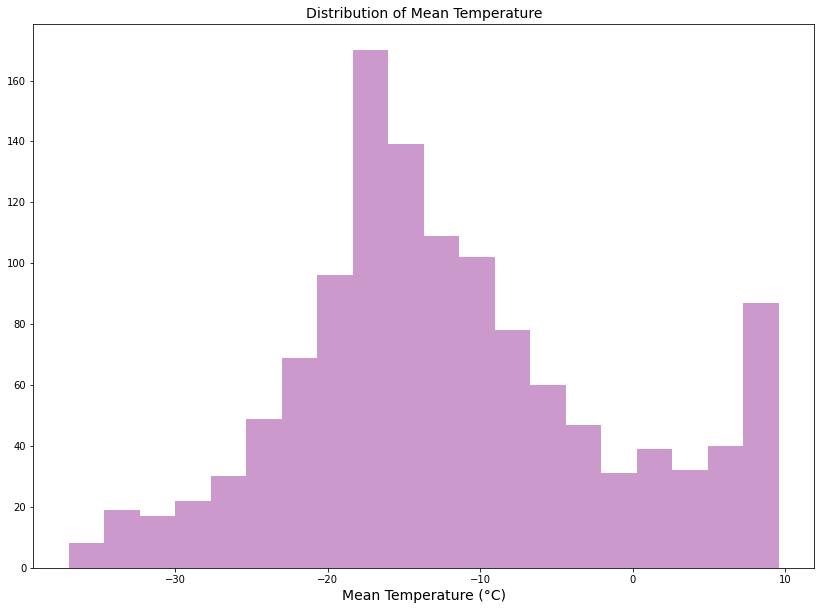

In [11]:
 

import seaborn as sns

sns.distplot(weather_df['Tm'], color='purple', kde=False)
plt.xlabel('Mean Temperature (°C)', fontsize=14)
plt.title("Distribution of Mean Temperature", fontsize=14)
plt.savefig("Dist_of_Mean_Temp.png", dpi=200)
plt.show()

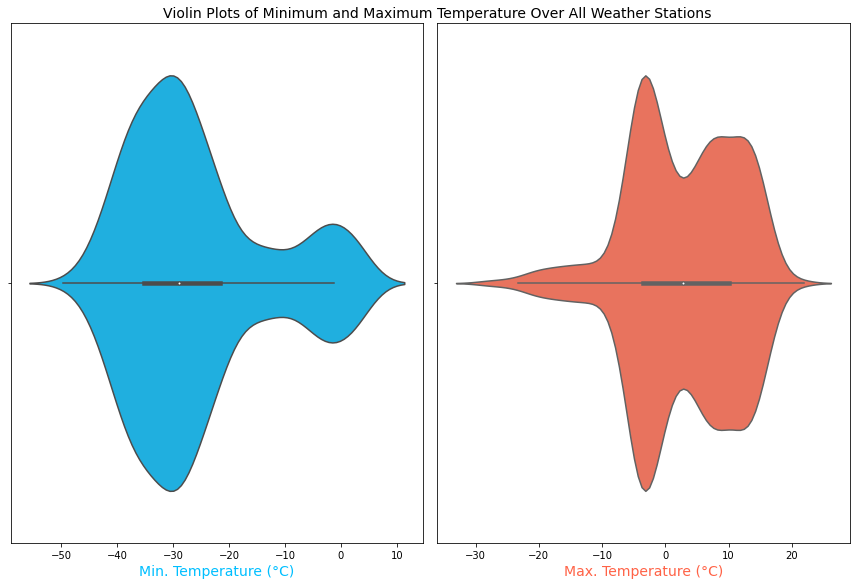

In [12]:
# Violin Plots of Minimum and Maximum Temperature
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x=weather_df["Tn"], color='deepskyblue')
plt.xlabel("Min. Temperature (°C)", fontsize=14, color='deepskyblue')
plt.subplot(1,2,2)
sns.violinplot(x=weather_df["Tx"], color='tomato')
plt.xlabel("Max. Temperature (°C)", fontsize=14, color='tomato')
plt.tight_layout()
plt.title("Violin Plots of Minimum and Maximum Temperature Over All Weather Stations", fontsize=14, x=-0.0)
plt.savefig("Violin_Plots_Min_Max_Temp.png", dpi=200)
plt.show()

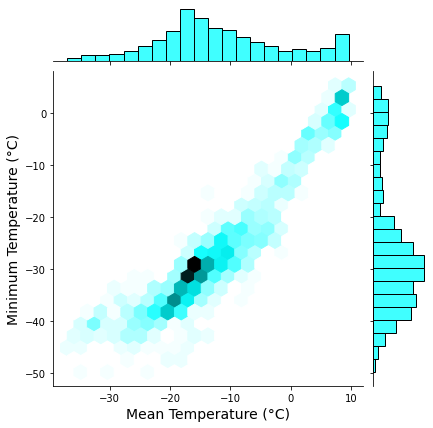

In [13]:
# Joint Plot of Mean Temperature and Minimum Temperature
g=sns.jointplot(x=weather_df['Tm'], y=weather_df['Tn'], kind='hex', color='cyan')
g.set_axis_labels("Mean Temperature (°C)","Minimum Temperature (°C)", fontsize=14)
plt.savefig("Hex_Tm_Tn.png", dpi=200)
plt.show()

### Proceed To Clustering using DBSCAN

In [15]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_clus_temp = weather_df[["Tm", "Tx", "Tn"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.3, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_
print (labels[500:560])
weather_df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
set(labels)

{-1, 0, 1}

#### Plot the Clusters in the Map. 

In [19]:
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
'''
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = weather_df[weather_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number)+', Average Mean Temp: '+ str(np.mean(clust_set.Tm)))
plt.title(r"Weather Stations in Canada Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)   
'''     

'\nmy_map = Basemap(projection=\'merc\',\n            resolution = \'l\', area_thresh = 1000.0,\n            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)\n            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)\n\nmy_map.drawcoastlines()\nmy_map.drawcountries()\n#my_map.drawmapboundary()\n#my_map.fillcontinents(color = \'white\', alpha = 0.3)\nmy_map.drawlsmask(land_color=\'orange\', ocean_color=\'skyblue\')\n#my_map.shadedrelief()\n#my_map.bluemarble()\n#my_map.shadedrelief()\nmy_map.etopo()\n\n# To create a color map\ncolors = plt.get_cmap(\'jet\')(np.linspace(0.0, 1.0, clusterNum))\n\n\n\n#Visualization1\nfor clust_number in set(labels):\n    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])\n    clust_set = weather_df[weather_df.Clus_Db == clust_number]                    \n    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker=\'o\', s= 40, alpha = 0.65)\n    if clust

## Repeat The Process One More Time Including Precipitation as Feature  

In [21]:
# stop the SettingWithCopyWarning: 
pd.options.mode.chained_assignment = None  # default='warn'
#

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_copy = weather_df.copy()
weather_df_clus_temp_P = weather_df_copy[["Tm", "Tx", "Tn","P"]]

weather_df_clus_temp_P.dropna(subset=["Tm", "Tx", "Tn", "P"], inplace=True)
print ("After Dropping Rows that contains NaN on Precipitation Column: ", weather_df_clus_temp_P.shape)

print (weather_df_clus_temp_P.head(6))

After Dropping Rows that contains NaN on Precipitation Column:  (1136, 4)
    Tm    Tx   Tn      P
0  8.2  13.5  1.0  178.8
1  7.0  15.0 -3.0  258.6
2  6.8  16.0 -2.5  264.6
4  7.7  14.5 -1.0  168.4
5  8.8  13.1  1.9   81.0
6  8.9  13.5  2.0  110.0


In [23]:
#print (weather_df_clus_temp.shape)
weather_df_clus_temp_P_arr = weather_df_clus_temp_P[["Tm", "Tx", "Tn", "P"]]
weather_df_clus_temp_P_arr = StandardScaler().fit_transform(weather_df_clus_temp_P_arr)

db_P = DBSCAN(eps=0.5, min_samples=10).fit(weather_df_clus_temp_P_arr)
# # create an array of zeroes of same size as db.labels_. db.labels_ is an array containing labels for 
labels_P = db_P.labels_
print(labels_P[500:560])
print (labels_P.dtype)
#print(np.isnan(labels_P).any())
weather_df_clus_temp_P["Clus_Db_"]=labels_P

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
int64


In [24]:
weather_df_clus_temp_P.head(6)

,Tm,Tx,Tn,P,Clus_Db_
0,8.2,13.5,1.0,178.8,0
1,7.0,15.0,-3.0,258.6,0
2,6.8,16.0,-2.5,264.6,0
4,7.7,14.5,-1.0,168.4,0
5,8.8,13.1,1.9,81.0,0
6,8.9,13.5,2.0,110.0,0


In [25]:
realClusterNum_P=len(set(labels_P)) - (1 if -1 in labels_P else 0)
clusterNum_P = len(set(labels_P)) 


print (set(labels_P))

{0, -1}


In [ ]:
'''from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map1 = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map1.drawcoastlines()
my_map1.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map1.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map1.etopo()

# To create a color map
colors1 = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum_P))



#Visualization1
for clust_number_P in set(labels_P):
    c=(([0.4,0.4,0.4]) if clust_number_P == -1 else colors1[np.int(clust_number_P)])
    clust_set_P = weather_df_clus_temp_P[weather_df_clus_temp_P.Clus_Db_ == clust_number_P]                    
    my_map.scatter(clust_set_P.xm, clust_set_P.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number_P != -1:
        cenx=np.mean(clust_set_P.xm) 
        ceny=np.mean(clust_set_P.ym) 
        plt.text(cenx,ceny,str(clust_number_P), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number_P)+', Average Mean Temp: '+ str(np.mean(clust_set_P.Tm)))
        print ("Cluster "+str(clust_number_P)+', Average Mean Precipitation: '+ str(np.mean(clust_set_P.P)))
plt.savefig("etopo_cluster_preci.png", dpi=300)
'''